# Location Intelligence Data Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
np.random.seed = 42

# Feature Engineering

In [2]:
df = pd.read_csv('./DATA/google_places_data.csv')

In [3]:
df = df.dropna(how='any').reset_index(drop = True)
df = df.drop_duplicates(subset=['business_id'])

### Train, Validation and Test Sets

In [4]:
X_dev, X_test = train_test_split(df, test_size=0.3, random_state=42)
X_train, X_val = train_test_split(X_dev, test_size=0.3, random_state=42)

#### Outliers

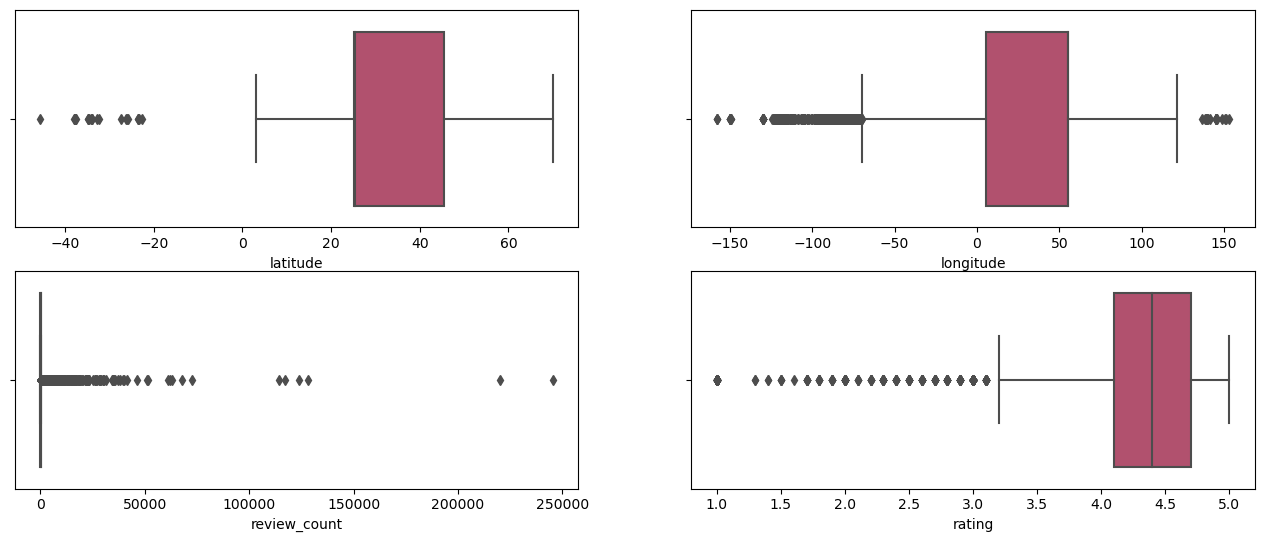

In [5]:
plt.figure(figsize = (16,13))

for i, col in enumerate(['latitude', 'longitude', 'review_count', 'rating']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = X_train, palette='flare')
plt.show()

##### Cutting off review_count

In [6]:
review_count_count = X_train["review_count"].value_counts().reset_index(name='count')
review_count_count = review_count_count[review_count_count['count'] > 100]
review_count_count

,review_count,count
0,32.0,1338
1,1.0,516
2,2.0,335
3,3.0,263
4,4.0,210
5,5.0,153
6,6.0,138
7,7.0,123
8,8.0,111
9,9.0,106


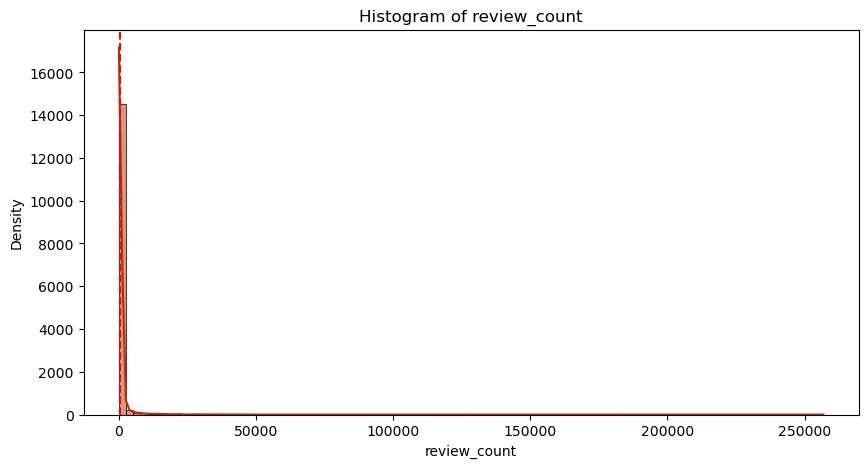

Value above which highest 5% of the data falls: 565.0


In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['review_count'], bins=100, kde=True, color='#bb2e00', edgecolor='black')

highest_2_percent = df['review_count'].quantile(0.90)
plt.axvline(x=highest_2_percent, color='red', linestyle='--')
plt.title('Histogram of review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.show()
print("Value above which highest 5% of the data falls:", highest_2_percent)

In [8]:
df.loc[df['review_count'] > highest_2_percent, 'review_count'] = highest_2_percent

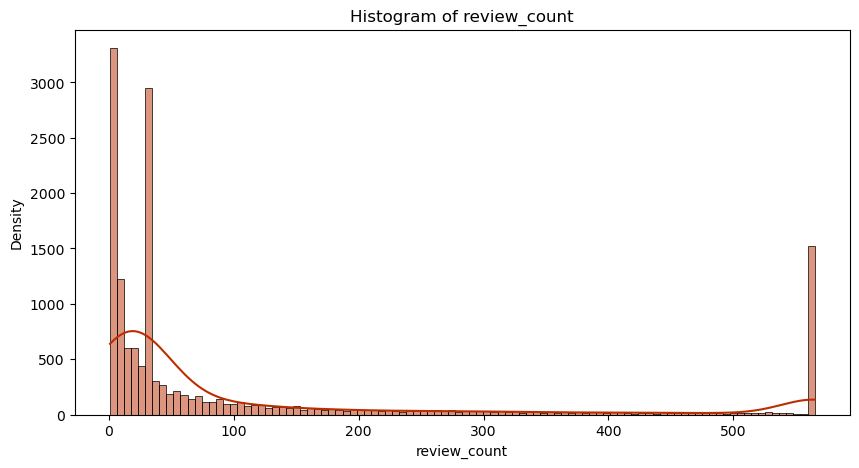

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['review_count'], bins=100, kde=True, color='#bb2e00', edgecolor='black')
plt.title('Histogram of review_count')
plt.xlabel('review_count')
plt.ylabel('Density')
plt.show()

In [10]:
# nie usuwałabym rating te niskie oceny mogą być dość istotne dla modelu

##### Cutting off rating

In [11]:
# plt.figure(figsize=(10, 5))
# sns.histplot(df['rating'], bins=41, kde=True, color='#bb2e00', edgecolor='black')

# lowest_2_percent = df['rating'].quantile(0.02)
# plt.axvline(x=lowest_2_percent, color='red', linestyle='--')
# plt.title('Histogram of rating')
# plt.xlabel('rating')
# plt.ylabel('Density')
# plt.show()
# print("Value above which lowest 2% of the data falls:", lowest_2_percent)

In [12]:
# df.loc[df['rating'] < lowest_2_percent, 'rating'] = lowest_2_percent

In [13]:
# plt.figure(figsize=(10, 5))
# sns.histplot(df['rating'], bins=29, kde=True, color='#bb2e00', edgecolor='black')
# plt.title('Histogram of rating')
# plt.xlabel('rating')
# plt.ylabel('Density')
# plt.show()